# 비지도 학습
- 입력데이터(x)만 존재, 출력(y)없음

In [1]:
#p 221 10개의 숫자 이미지 OCR(Optical) 광학 Character, 글자 Reconginzation 인식
# 비지도 학습으로 숫자 인식을 할 수 있습니다.

In [2]:
#p221
from sklearn.datasets import load_digits  #digits 숫자

In [3]:
digits = load_digits()

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.images.shape

(1797, 8, 8)

In [8]:
import matplotlib.pyplot as plt

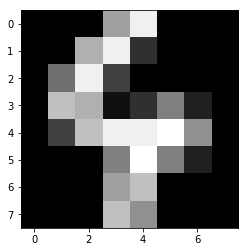

In [9]:
plt.imshow(digits.images[110],cmap='gray')

In [10]:
# 221 64개의 명암을 2개로 차원축소를 해서 2차원 그래프에 산점도를 그려봅니다.

In [11]:
from sklearn.decomposition import PCA
import mglearn

In [12]:
pca = PCA(n_components=2).fit(digits.data)  #64차원을 2차원으로 축소

In [13]:
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca_x = pca.transform(digits.data)
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

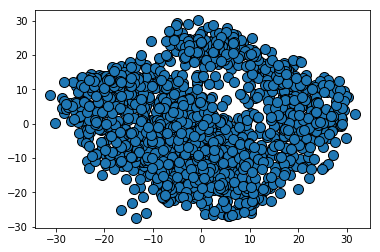

In [15]:
mglearn.discrete_scatter(pca_x[:,0],pca_x[:,1])

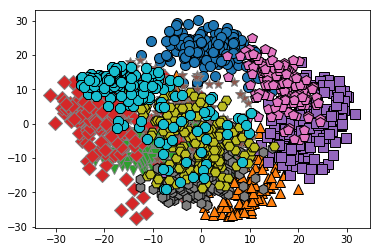

In [16]:
l = mglearn.discrete_scatter(pca_x[:,0],pca_x[:,1], digits.target)

In [17]:
#223
from sklearn.manifold import TSNE

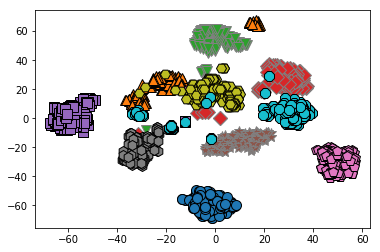

In [18]:
digits_tsne = TSNE().fit_transform(digits.data)
l = mglearn.discrete_scatter(digits_tsne[:,0],digits_tsne[:,1], digits.target)

#225 군집(clustering) - 분류, 이상치 검출(Abnormal Detection)
- k평균 군집
- 병합 군집
- DBSCAN(Density based spatial clustering Application Noise) 밀도가 높은 공간

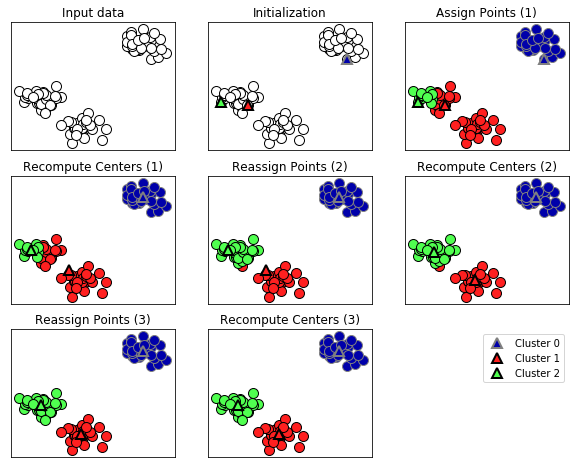

In [19]:
mglearn.plots.plot_kmeans_algorithm()

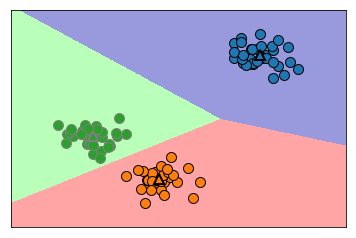

In [20]:
mglearn.plots.plot_kmeans_boundaries()

In [21]:
from sklearn.datasets import make_blobs
x, y = make_blobs() # 연습용 데이터셋
x.shape, y.shape

((100, 2), (100,))

In [22]:
from sklearn.cluster import KMeans

In [23]:
km = KMeans(n_clusters=3).fit(x)  # x를 3개로 그룹화(cluster)

In [24]:
km.predict(x)  # x가 몇번째 그룹이니?

array([2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 0,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2,
       1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 2])

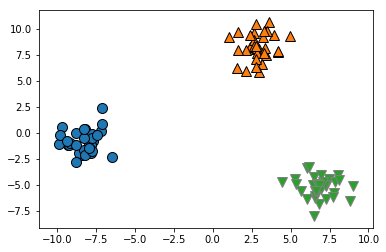

In [25]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], y)

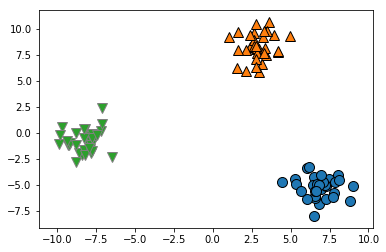

In [26]:
l = mglearn.discrete_scatter(x[:,0],x[:,1], km.predict(x))

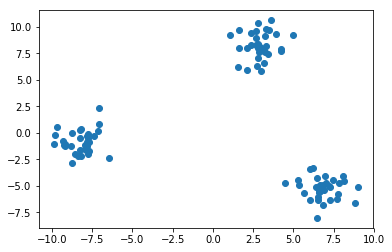

In [27]:
l = plt.scatter(x[:,0],x[:,1])

digits에 적용해보세요
- t-SNE로 2개의 차원으로 축소합니다.
- 그 데이터로 k-Means를 fit합니다. k=10
- k-Means 의 예측을 산점도에 표시합니다.

from sklearn.manifold import TSNE
digits.tsne = TSNE().fit_transform(digts.data)

In [28]:
km = KMeans(n_clusters=10).fit(digits_tsne)

In [29]:
predict_group = km.predict(digits_tsne)

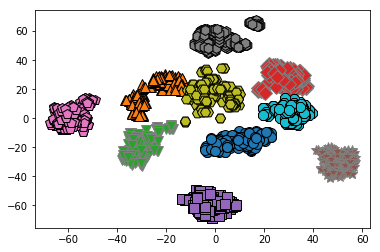

In [30]:
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], predict_group)

## 한국 프로야구 10개팀 클러스터링

In [31]:
import pandas as pd
url = 'http://www.kbreport.com'
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [32]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [33]:
baseball = tables[0]
baseball

,순위,팀명,승,무,패,승률,게임차,득점,실점,연속
0,1,SK,59,1,29,0.670,0.0,441,342,2패
1,2,두산,54,0,36,0.600,6.0,440,346,2승
2,3,Hero,54,0,37,0.593,6.5,500,387,4승
3,4,LG,49,1,38,0.563,9.5,377,377,1패
4,5,NC,42,1,44,0.488,16.0,409,415,2패
5,6,KT,42,1,47,0.472,17.5,407,456,1패
6,7,삼성,37,1,49,0.430,21.0,400,424,2승
7,8,KIA,36,1,52,0.409,23.0,401,467,2패
8,9,한화,34,0,53,0.391,24.5,388,449,1승
9,10,롯데,32,2,54,0.372,26.0,407,507,1승


In [34]:
base = baseball.set_index('팀명')
# baseball.set_index('팀명', inplace=True)   # return없이 자체적으로 바꾸기
base

,순위,승,무,패,승률,게임차,득점,실점,연속
팀명,,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342,2패
두산,2,54,0,36,0.600,6.0,440,346,2승
Hero,3,54,0,37,0.593,6.5,500,387,4승
LG,4,49,1,38,0.563,9.5,377,377,1패
NC,5,42,1,44,0.488,16.0,409,415,2패
KT,6,42,1,47,0.472,17.5,407,456,1패
삼성,7,37,1,49,0.430,21.0,400,424,2승
KIA,8,36,1,52,0.409,23.0,401,467,2패
한화,9,34,0,53,0.391,24.5,388,449,1승


In [35]:
base.dtypes

순위       int64
승        int64
무        int64
패        int64
승률     float64
게임차    float64
득점       int64
실점       int64
연속      object
dtype: object

In [36]:
# '연속'컬럼 속성도 object이고 데이터 필요없으므로 버림
data = base.drop(columns='연속')
data

,순위,승,무,패,승률,게임차,득점,실점
팀명,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342
두산,2,54,0,36,0.600,6.0,440,346
Hero,3,54,0,37,0.593,6.5,500,387
LG,4,49,1,38,0.563,9.5,377,377
NC,5,42,1,44,0.488,16.0,409,415
KT,6,42,1,47,0.472,17.5,407,456
삼성,7,37,1,49,0.430,21.0,400,424
KIA,8,36,1,52,0.409,23.0,401,467
한화,9,34,0,53,0.391,24.5,388,449


In [37]:
data.shape

(10, 8)

In [38]:
# 현재 8차원,,,, 2차원으로 변환한 후 k개로 클러스터링
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(data)

In [39]:
data_pca = pca.transform(data)
data_pca.shape

(10, 3)

In [40]:
# k means로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

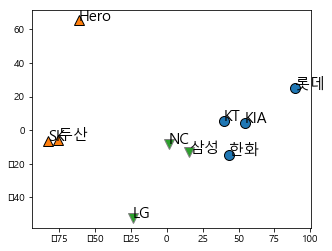

In [41]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize = (5,4))
plt.xlim(data_pca[:,0].min(),data_pca[:,0].max()+1)
plt.xlim(data_pca[:,1].min(),data_pca[:,0].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0],data_pca[i,1], data.index[i], fontdict={'size':15})
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1],group)

## 머신러닝 저장소 - 3위 와인 데이터
와인의 질, 컬럼, 알콜 도수 등을 측정 -> 원산지 (3군데) 를 추정하는 문제

In [42]:
wine = pd.read_csv('wine.data')
len(wine)

177

In [43]:
wine.dtypes

1          int64
14.23    float64
1.71     float64
2.43     float64
15.6     float64
127        int64
2.8      float64
3.06     float64
.28      float64
2.29     float64
5.64     float64
1.04     float64
3.92     float64
1065       int64
dtype: object

In [44]:
df = wine.iloc[:,1:]
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(df)

In [45]:
df_pca = pca.transform(df)
df_pca.shape

(177, 3)

In [46]:
km = KMeans(n_clusters=3).fit(df_pca)
group = km.predict(df_pca)

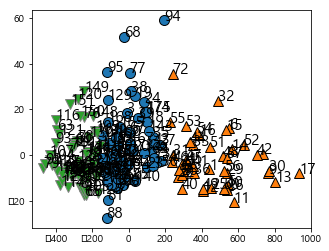

In [47]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize = (5,4))
plt.xlim(df_pca[:,0].min(),df_pca[:,0].max()+1)
plt.xlim(df_pca[:,1].min(),df_pca[:,0].max()+1)
for i in range(len(df_pca)):
    plt.text(df_pca[i,0],df_pca[i,1], df.index[i], fontdict={'size':15})
l = mglearn.discrete_scatter(df_pca[:,0], df_pca[:,1],group)

## 대출상환 여부
- get_dummy()로 purpose 원핫 인코딩
- PCA로 2차원 축소
- K-Means (2개)로 그룹화
- 산점도로 출력

In [52]:
loans = pd.read_csv('loans.csv')
loans = loans.dropna()
loans_hot = pd.get_dummies(loans)

In [56]:
pca = PCA(n_components=2).fit(loans_hot)# 2차원으로 
x_pca = pca.transform(loans_hot) # 주성분 2개 추출
km = KMeans(n_clusters=2).fit(x_pca) # 2개로 그룹화
group = km.predict(x_pca)

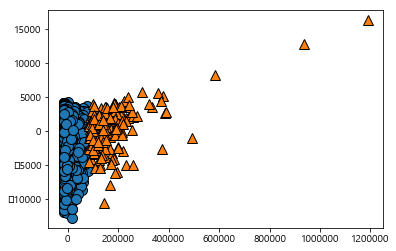

In [57]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1],group)  #예측

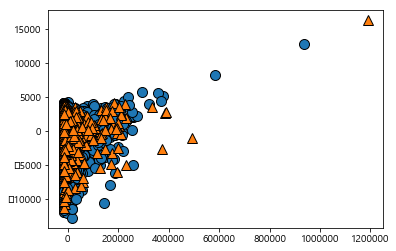

In [58]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], loans.iloc[:,-1])  #실제로 돈 안값는 사람

In [ ]:
교사학습 - X / Y
비교사학습 - X차원축소 , 클러스터링